<u><h2> Group Project Report </H2><u/>

In [3]:
library(tidyverse)
library(tidymodels)
library(readxl)

**<u><h4>Introduction</u></h4>**

- Students' performance in an exam can be a determinant of their level of knowledge on any given subject. If a student has a high performance in an exam, then they can be considered to have high knowledge on the topic. However, we are not sure how preparation or pre-existing knowledge of a related topic affects a student's knowledge level on a topic.



- So, through the data set of the user knowledge, which is about students' knowledge of electrical DC machines (Kahraman et al., 2013), we attempt to determine a relationship between preparation/pre-existing knowledge. The dataset contains 6 unique variables, described as follows:
1. Degree of study time for goal object materials (STG),
2. Degree of repetition number of the user for goal object materials (SCG),
3. Degree of study time of the user for related objects with goal object (STR).
4. Exam performance of the user for related objects with goal object (LPR).
5. Exam performance of the user for goal objects (PEG).
6. The Knowledge level of the user (UNS)

- Through this data set, we hope to answer the question: Given n observation with known STC, SCG, STR, LPR, and PEG, what is its category of UNS

**<u><h4>Preliminary exploratory data analysis</u></h4>**

In [29]:
#Import data
download.file("https://archive.ics.uci.edu/static/public/257/user+knowledge+modeling.zip",
                   destfile="Data_User_Modeling_Dataset_Hamdi Tolga KAHRAMAN.zip")
#Extract data from a zip file
unzip("Data_User_Modeling_Dataset_Hamdi Tolga KAHRAMAN.zip", 
      exdir = "data")
#wrangle data
data_train<-read_excel("data/Data_User_Modeling_Dataset_Hamdi Tolga KAHRAMAN.xls",sheet=2)|>
    select(STG:UNS)|>
    mutate(UNS=as_factor(UNS))
 
data_test<-read_excel("data/Data_User_Modeling_Dataset_Hamdi Tolga KAHRAMAN.xls",sheet=3)|>
    select(STG:UNS)|>
    mutate(UNS=as_factor(UNS))|>
    mutate(UNS=fct_recode(UNS,"very_low"="Very Low"))# change the label of "Very Low" in the test dataset to "very_low"
#head(data_train)
#head(data_test)

New names:
• `` -> `...7`
• `` -> `...8`
New names:
• `` -> `...7`
• `` -> `...8`


In [27]:
# Summarize training data grouped by difference UNS for each quantitative variable in 5 tables
print("Table Number 1~6: The summary statistics of STC, SCG, STR, LPR, and PEG for each level of NUS")
data_train|>group_by(UNS)|>
    summarize("Mean of STG"=mean(STG),
             "Standard deviation of STG"=sd(STG),
             "Max of STG"=max(STG),
             "Min of STG"=min(STG))

data_train|>group_by(UNS)|>
    summarize("Mean of SCG"=mean(SCG),
             "Standard deviation of SCG"=sd(SCG),
             "Max of SCG"=max(SCG),
             "Min of SCG"=min(SCG))

data_train|>group_by(UNS)|>
    summarize("Mean of STR"=mean(STR),
             "Standard deviation of STR"=sd(STR),
             "Max of STR"=max(STR),
             "Min of STR"=min(STR))

data_train|>group_by(UNS)|>
    summarize("Mean of LPR"=mean(LPR),
             "Standard deviation of LPR"=sd(LPR),
             "Max of LPR"=max(LPR),
             "Min of LPR"=min(LPR))

data_train|>group_by(UNS)|>
    summarize("Mean of PEG"=mean(PEG),
             "Standard deviation of PEG"=sd(PEG),
             "Max of PEG"=max(PEG),
             "Min of PEG"=min(PEG))
# Summarize the number of observations of each category of UNS
data_train|>group_by(UNS)|>
    summarize("Number of users"=n())

[1] "Table Number 1~6: The summary statistics of STC, SCG, STR, LPR, and PEG for each level of NUS"


UNS      Mean of STG Standard deviation of STG Max of STG Min of STG
1 very_low 0.3057917   0.1872919                 0.68       0.00      
2 High     0.4216508   0.2396612                 0.99       0.00      
3 Low      0.3211446   0.1739915                 0.73       0.02      
4 Middle   0.3999773   0.2135850                 0.80       0.06

UNS      Mean of SCG Standard deviation of SCG Max of SCG Min of SCG
1 very_low 0.1981250   0.1363245                 0.60       0.000     
2 High     0.4231905   0.2340361                 0.90       0.000     
3 Low      0.3370000   0.1927264                 0.85       0.010     
4 Middle   0.3679205   0.2076783                 0.85       0.015

UNS      Mean of STR Standard deviation of STR Max of STR Min of STR
1 very_low 0.3662500   0.2184891                 0.71       0.00      
2 High     0.5016667   0.2587361                 0.95       0.02      
3 Low      0.4307229   0.2515308                 0.88       0.02      
4 Middle   0.5068182   0.2284558                 0.89       0.02

UNS      Mean of LPR Standard deviation of LPR Max of LPR Min of LPR
1 very_low 0.3587500   0.1970282                 0.66       0.00      
2 High     0.5012698   0.2772881                 0.99       0.01      
3 Low      0.4973494   0.2251400                 0.98       0.04      
4 Middle   0.3428409   0.2279088                 0.88       0.02

UNS      Mean of PEG Standard deviation of PEG Max of PEG Min of PEG
1 very_low 0.09083333  0.05633106                0.24       0.00      
2 High     0.77253968  0.10756796                0.93       0.47      
3 Low      0.23762651  0.07299193                0.35       0.01      
4 Middle   0.54238636  0.12621815                0.83       0.25

UNS      Number of users
1 very_low 24             
2 High     63             
3 Low      83             
4 Middle   88

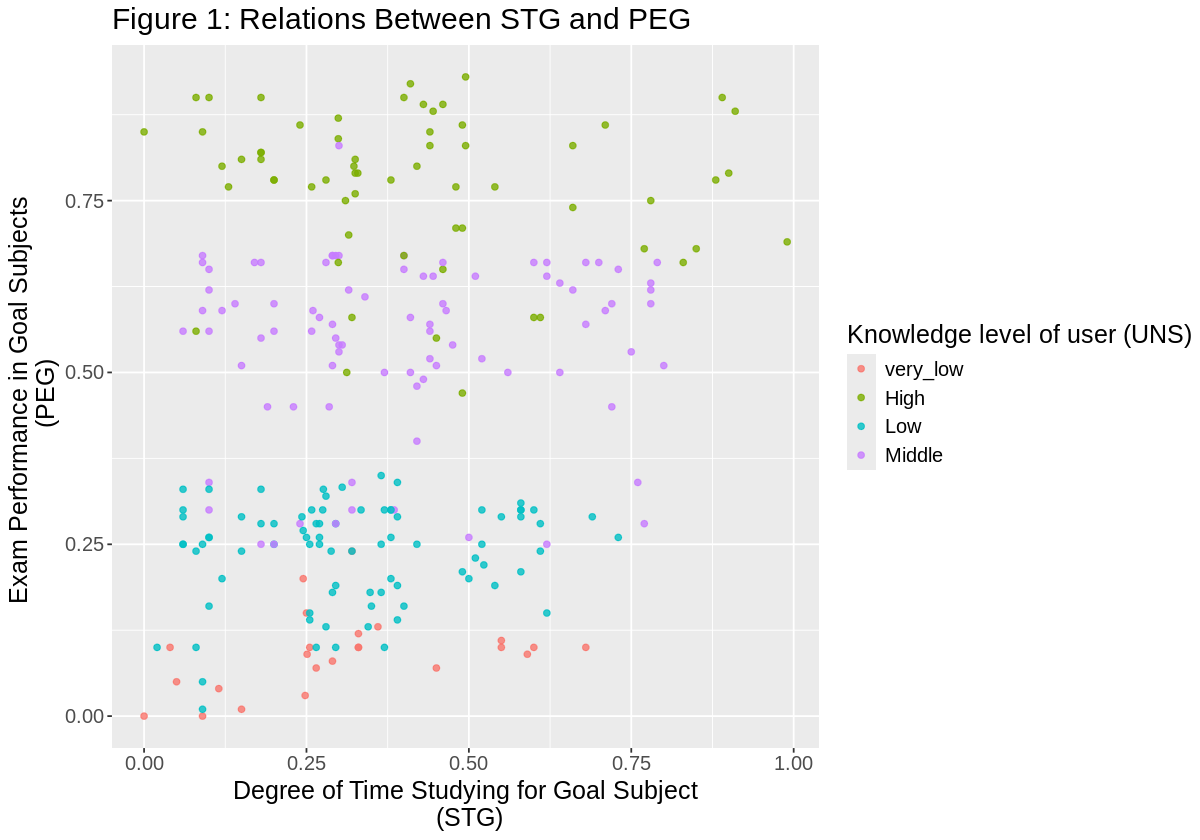

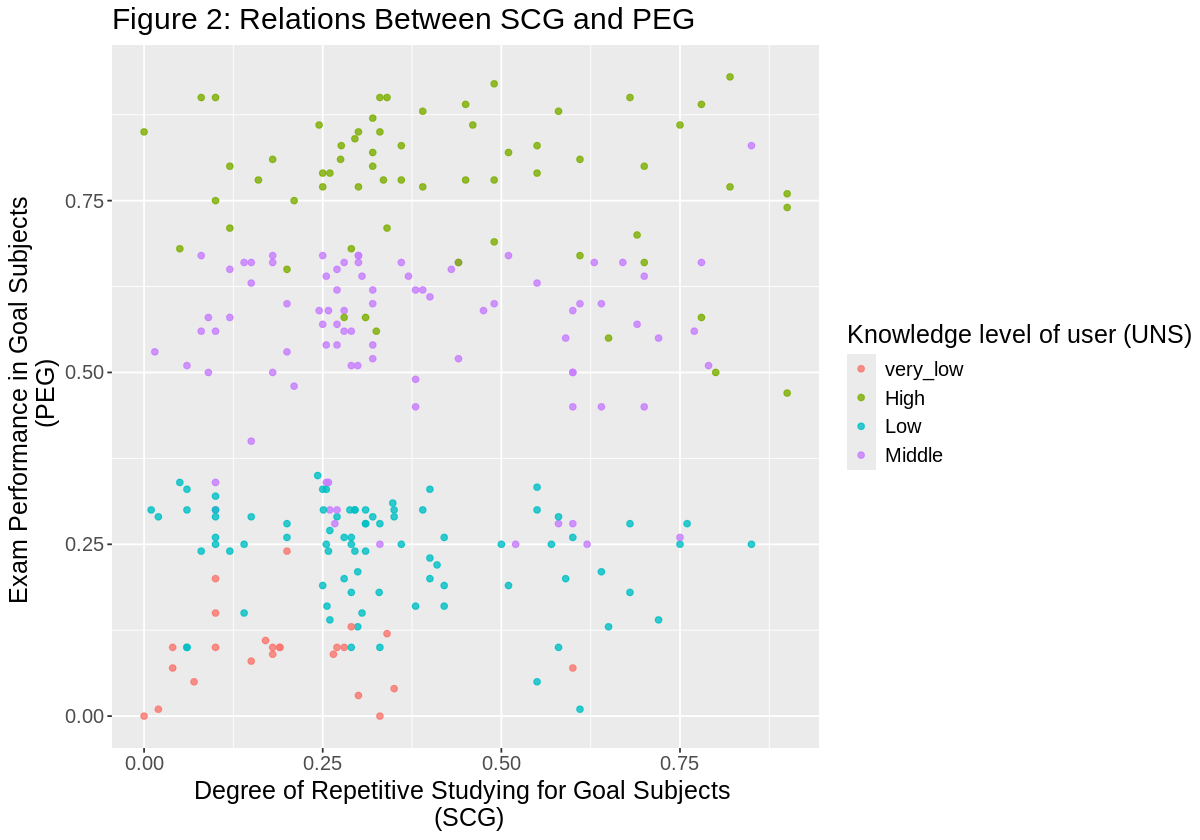

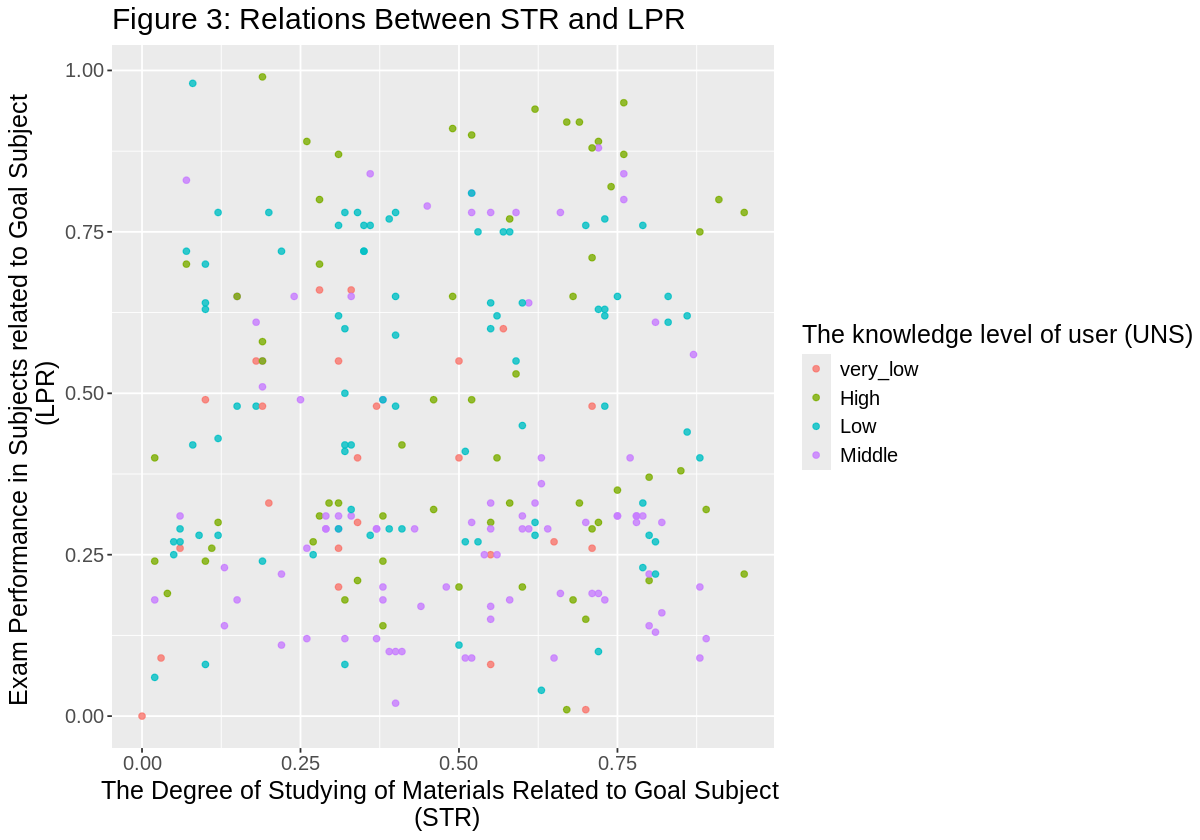

In [22]:
# Find relations between STG and PEG, between SCG and PEG, and between STR and LPR using 3 scatterplots in the training dataset.
# Use color=UNS to differentiate the UNS of each observation.
options(repr.plot.width=10,repr.plot.height=7)
plot_STG_PEG<-data_train|>ggplot(aes(x=STG,y=PEG,color=UNS))+
    geom_point(alpha=0.8)+
    ggtitle("Figure 1: Relations Between STG and PEG")+
    labs(x="Degree of Time Studying for Goal Subject\n (STG)",
        y="Exam Performance in Goal Subjects \n (PEG)",
        color="Knowledge level of user (UNS)")+
    theme(text=element_text(size=15))
plot_STG_PEG

plot_SCG_PEG<-data_train|>ggplot(aes(x=SCG,y=PEG,color=UNS))+
    geom_point(alpha=0.8)+
    ggtitle("Figure 2: Relations Between SCG and PEG")+
    labs(x="Degree of Repetitive Studying for Goal Subjects \n (SCG)",
        y="Exam Performance in Goal Subjects \n (PEG)",
        color="Knowledge level of user (UNS)")+
    theme(text=element_text(size=15))
plot_SCG_PEG

plot_STR_LPR<-data_train|>ggplot(aes(x=STR,y=LPR,color=UNS))+
    geom_point(alpha=0.8)+
    ggtitle("Figure 3: Relations Between STR and LPR")+
    labs(x="The Degree of Studying of Materials Related to Goal Subject \n (STR)",
        y="Exam Performance in Subjects related to Goal Subject \n (LPR)",
        color="The knowledge level of user (UNS)")+
    theme(text=element_text(size=15))
plot_STR_LPR

- analysis 

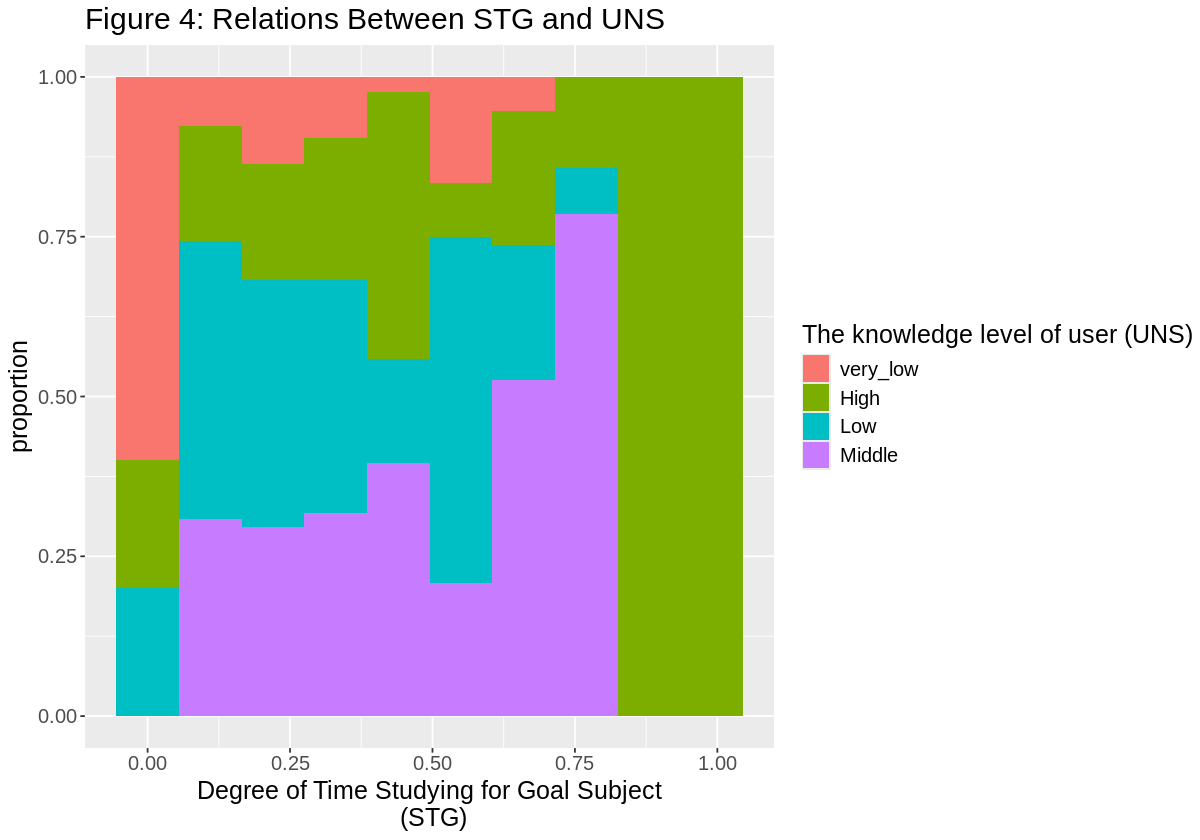

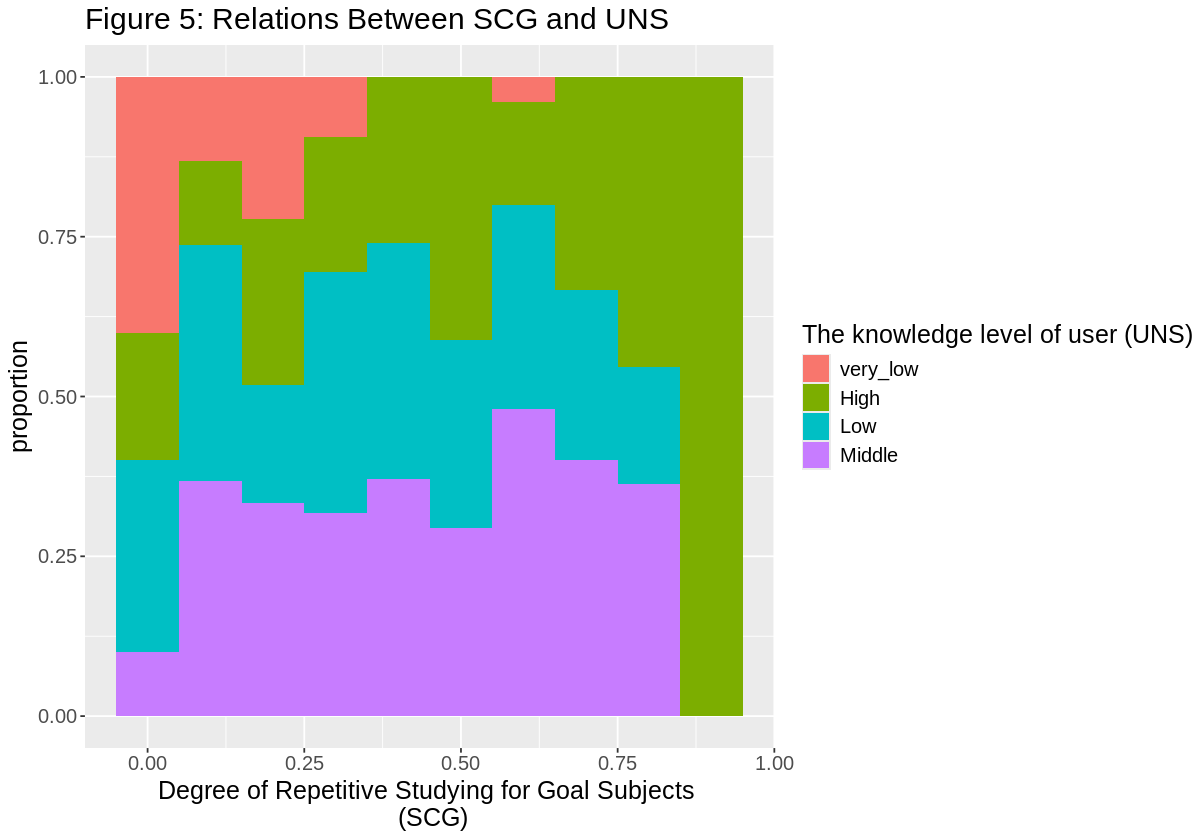

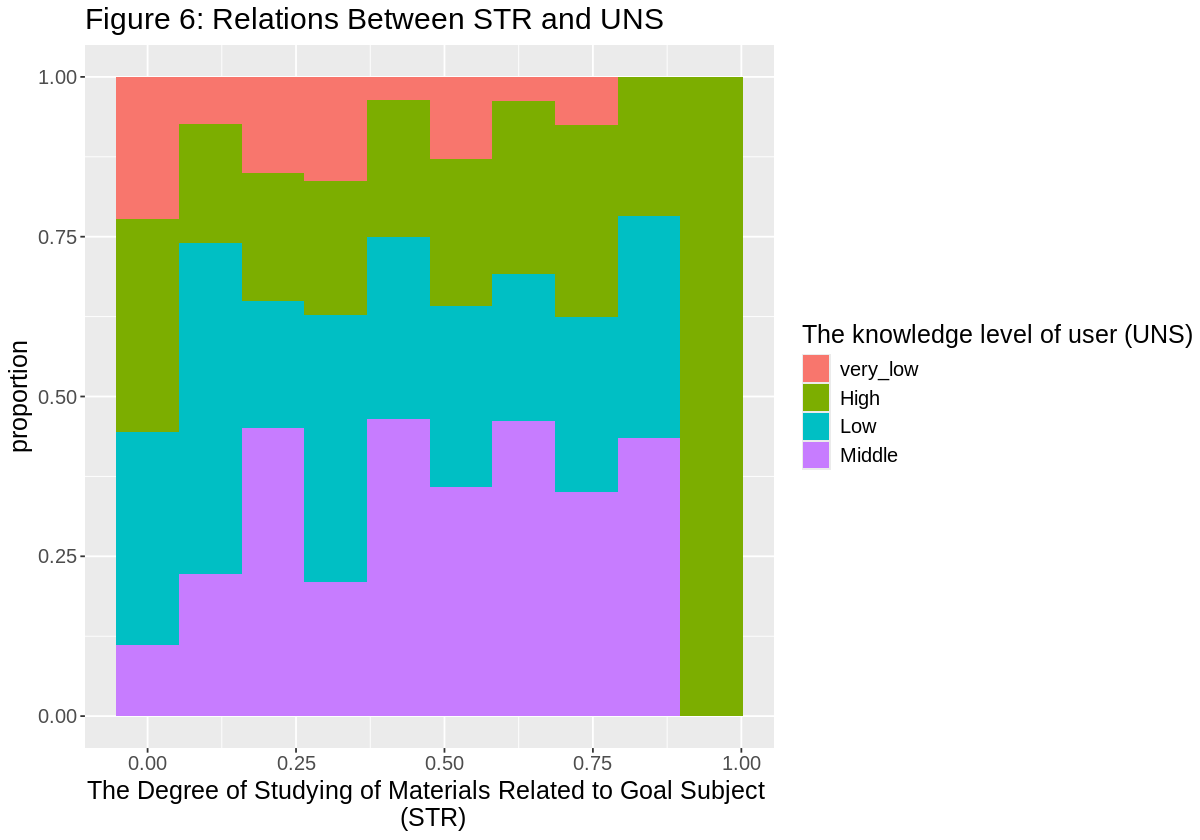

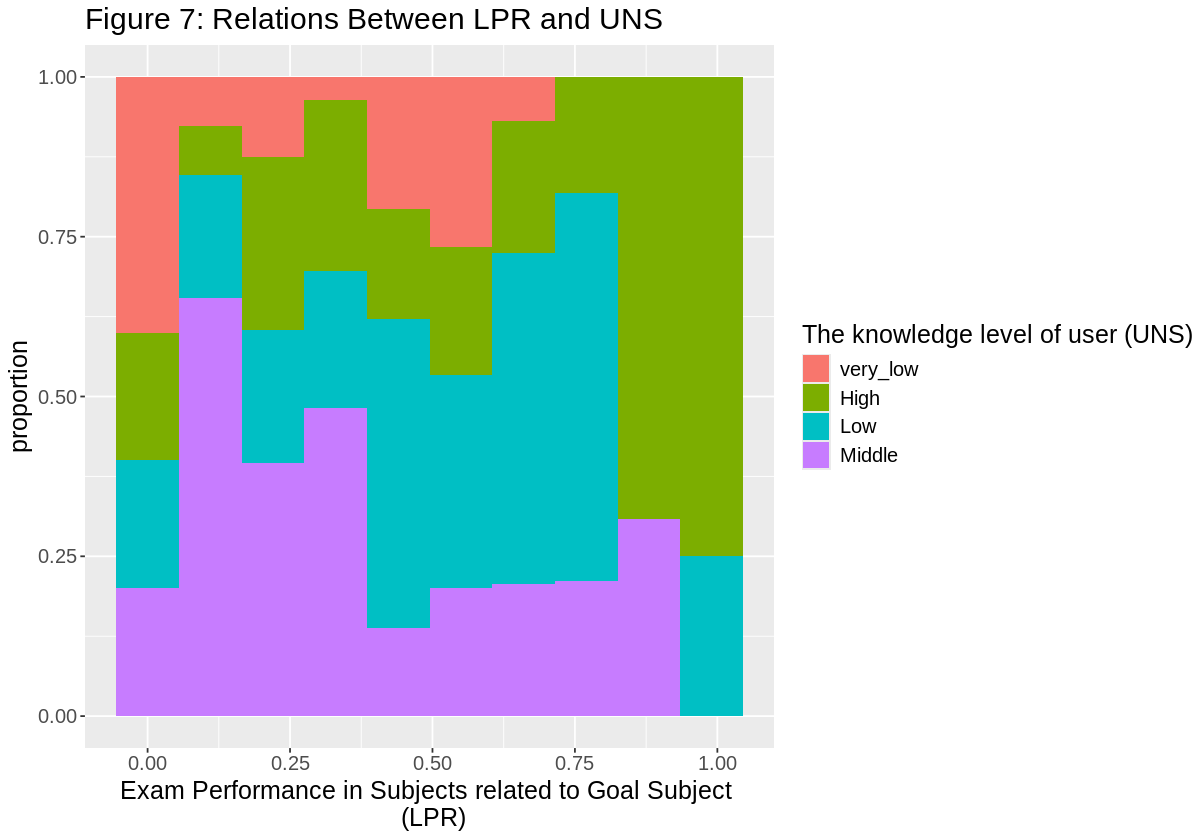

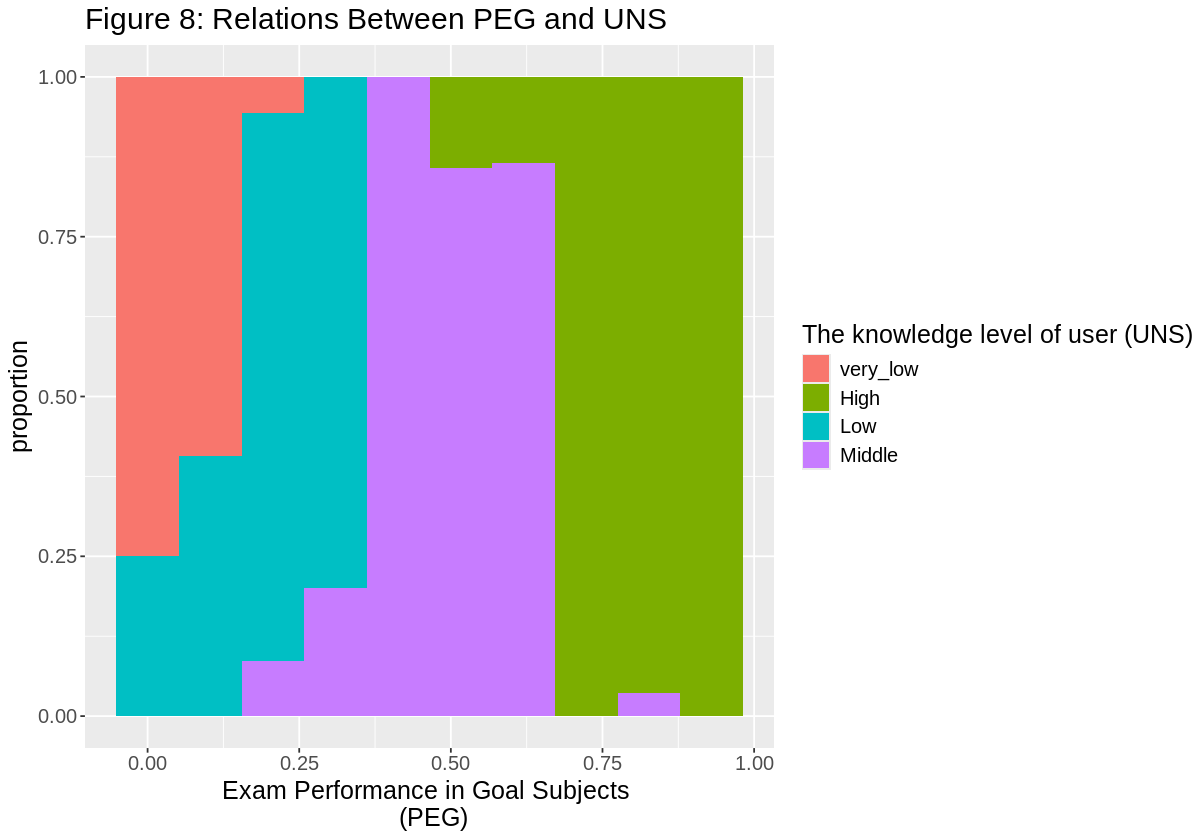

In [23]:
# Use histograms to find the relations between STG, SCG, STR, LPR, PEG and UNS respectively.
plot_STG_UNS<-data_train|>ggplot(aes(x=STG,fill=UNS))+
    geom_histogram(bins=10,position="fill")+
    ggtitle("Figure 4: Relations Between STG and UNS")+
    labs(x="Degree of Time Studying for Goal Subject\n (STG)",
         y="proportion",
        fill="The knowledge level of user (UNS)")+
    theme(text=element_text(size=15))
plot_STG_UNS
plot_SCG_UNS<-data_train|>ggplot(aes(x=SCG,fill=UNS))+
    geom_histogram(bins=10,position="fill")+
    ggtitle("Figure 5: Relations Between SCG and UNS")+
    labs(x="Degree of Repetitive Studying for Goal Subjects \n (SCG)",
         y="proportion",
        fill="The knowledge level of user (UNS)")+
    theme(text=element_text(size=15))
plot_SCG_UNS

plot_STR_UNS<-data_train|>ggplot(aes(x=STR,fill=UNS))+
    geom_histogram(bins=10,position="fill")+
    ggtitle("Figure 6: Relations Between STR and UNS")+
    labs(x="The Degree of Studying of Materials Related to Goal Subject \n (STR)",
         y="proportion",
        fill="The knowledge level of user (UNS)")+
    theme(text=element_text(size=15))
plot_STR_UNS

plot_STG_LPR<-data_train|>ggplot(aes(x=LPR,fill=UNS))+
    geom_histogram(bins=10,position="fill")+
    ggtitle("Figure 7: Relations Between LPR and UNS")+
    labs(x="Exam Performance in Subjects related to Goal Subject \n (LPR)",
         y="proportion",
        fill="The knowledge level of user (UNS)")+
    theme(text=element_text(size=15))
plot_STG_LPR

plot_PEG_LPR<-data_train|>ggplot(aes(x=PEG,fill=UNS))+
    geom_histogram(bins=10,position="fill")+
    ggtitle("Figure 8: Relations Between PEG and UNS")+
    labs(x="Exam Performance in Goal Subjects \n (PEG)",
         y="proportion",
        fill="The knowledge level of user (UNS)")+
    theme(text=element_text(size=15))
plot_PEG_LPR

- analysis

**<u><h4>Preliminary Data Analysis</u></h4>**
Our dataset is sourced from the UCI Machine Learning Repository, where we first unzipped and extracted the downloaded file to obtain an Excel file. The file itself contained preloaded data for a training set and a test set. While the initial data frame formats were relatively tidy, the UNS column vector needed to be changed to the factor type via. the select and mutate functions in Tidyverse. To prevent referencing errors, the value “Very Low” in the understanding column was changed to “very_low” using the factor recode argument in mutate. Next, the summarise function was applied to the training set to obtain a count for levels of understanding as well as the min, max, mean, and standard deviation of columns containing quantitative values. 
Scatterplots of exam performance and all variables were then plotted and analyzed to identify relationships, then histograms were employed to obtain an idea of the strengths of each relationship so appropriate predictors could be selected. 


**<u><h4>Method</u></h4>**

We will use the $k$ nearest neighbors’ algorithm to predict the category of UNS. We will scale columns of STG, SCG, and PEG to predict the UNS of a given point in the test data. We are using STG, SCG, and PEG because as the variables of these columns increases so does a student’s knowledge level. We will show our results in two scatterplots, SCG vs. PEG and STG and PEG, with both having coloured UNS data points.

**<u><h4>Expected outcomes and significance</u></h4>**
Since students who are struggling to understand data processing techniques are more likely to fail in this course, we are interested in the very_low category for understanding (UNS). As a result, we define very_low as the positive category of interest. Since we want to find all students with very low knowledge levels, the model needs to have a high recall in the "very_low" category. That being said, the model also needs to have (ideally) a high accuracy as well. This is so we can use our model to identify the study habits that lead to shallow understanding while also helping instructors find students who are struggling so that they may receive proper assistance. 

From developing our model, a future question that may be addressed is how might we use different weight functions to put more weight on PEG? Such research may be needed since the last histogram (figure 8) and the first two scatterplots (fig 1 & 2) indicate that PEG also plays a majority role in determining UNS.

In [1]:
install.packages("themis")# install package call themis since this is needed to balance data

also installing the dependencies ‘RANN’, ‘ROSE’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [9]:
# Training the knn model

library(themis)
set.seed(19)
knn_spec<-nearest_neighbor(weight_func="rectangular",neighbors=tune())|>
    set_engine("kknn")|>
    set_mode("classification")
recipe<-recipe(UNS~SCG+STG+PEG,data=data_train)|>
    step_center(all_predictors())|>
    step_scale(all_predictors())|>
    step_upsample(UNS,over_ratio=1)
klist=tibble(neighbors=seq(1,24,1))
cv_data<-vfold_cv(data_train,v=5,strata=UNS)
kbest<-workflow()|>
    add_recipe(recipe)|>
    add_model(knn_spec)|>
    tune_grid(cv_data,grid=klist)|>
    collect_metrics()|>
    filter(.metric=="accuracy")|>
    filter(mean==max(mean))|>
    select(neighbors)|>
    pull()


# Our best k is 7
knn_spec2<-nearest_neighbor(weight_func="rectangular",neighbors=kbest)|>
    set_engine("kknn")|>
    set_mode("classification")


model <-workflow()|>
    add_recipe(recipe)|>
    add_model(knn_spec2)|>
    fit(data_train)

kbest


[1] 7

- The best $K$ is 7

In [10]:
# Evaluating the knn model
data_test<-mutate(data_test,UNS = fct_relevel(UNS, "very_low", "High", "Low", "Middle"))
#levels(data_test$UNS)
#head(data_test)
accuracy<- model |>
    predict(data_test)|>
    bind_cols(data_test)|>
    metrics(truth=UNS, estimate=.pred_class)|>
    filter(.metric=="accuracy")|>
    select(.estimate)|>
    pull()

accuracy


[1] 0.7517241

- Our accuracy is 0.7517

In [28]:
# Confustion matrix
print("Table 7: Confusion Matrix of the results")
predictions<-model |>
    predict(data_test)|>
    bind_cols(data_test)
cof_mat<-conf_mat(predictions,truth=UNS,estimate=.pred_class)
cof_mat

[1] "Table 7: Confusion Matrix of the results"


          Truth
Prediction very_low High Low Middle
  very_low       14    0   6      0
  High            0   36   0      1
  Low            12    0  35      9
  Middle          0    3   5     24

- analysis:

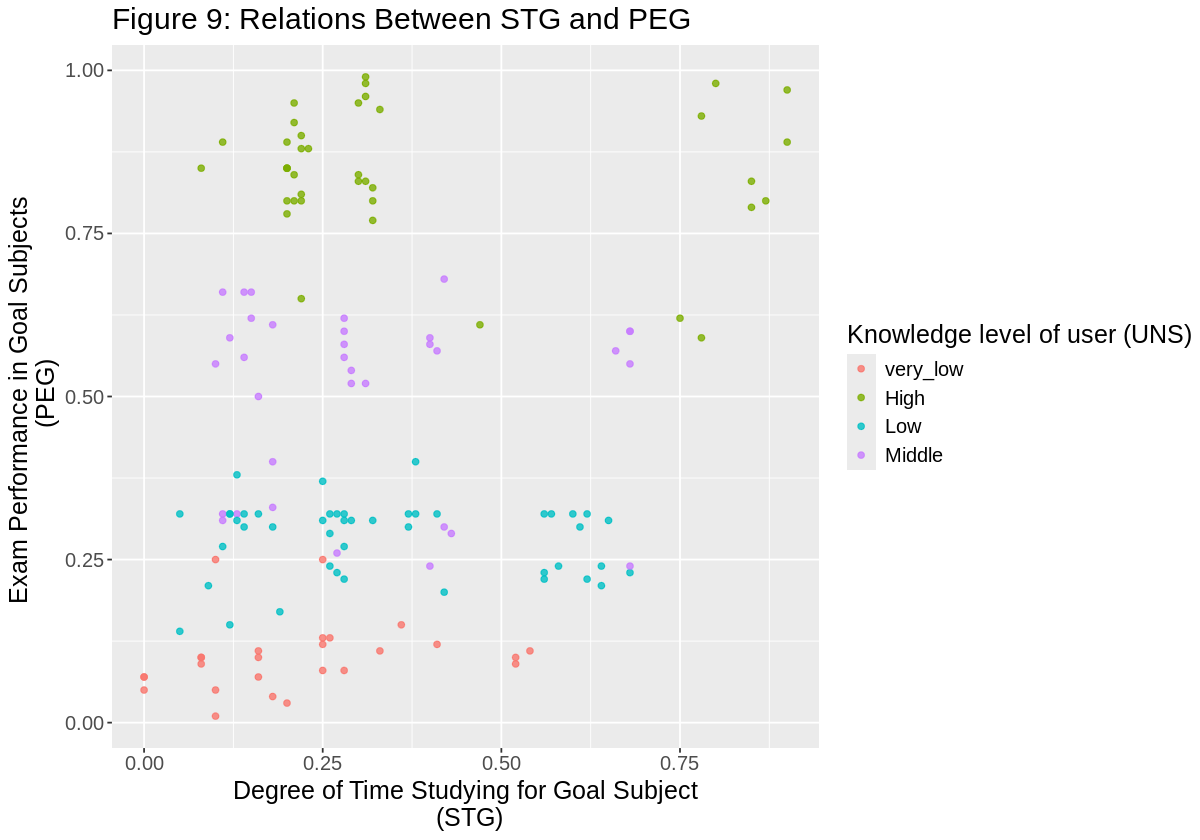

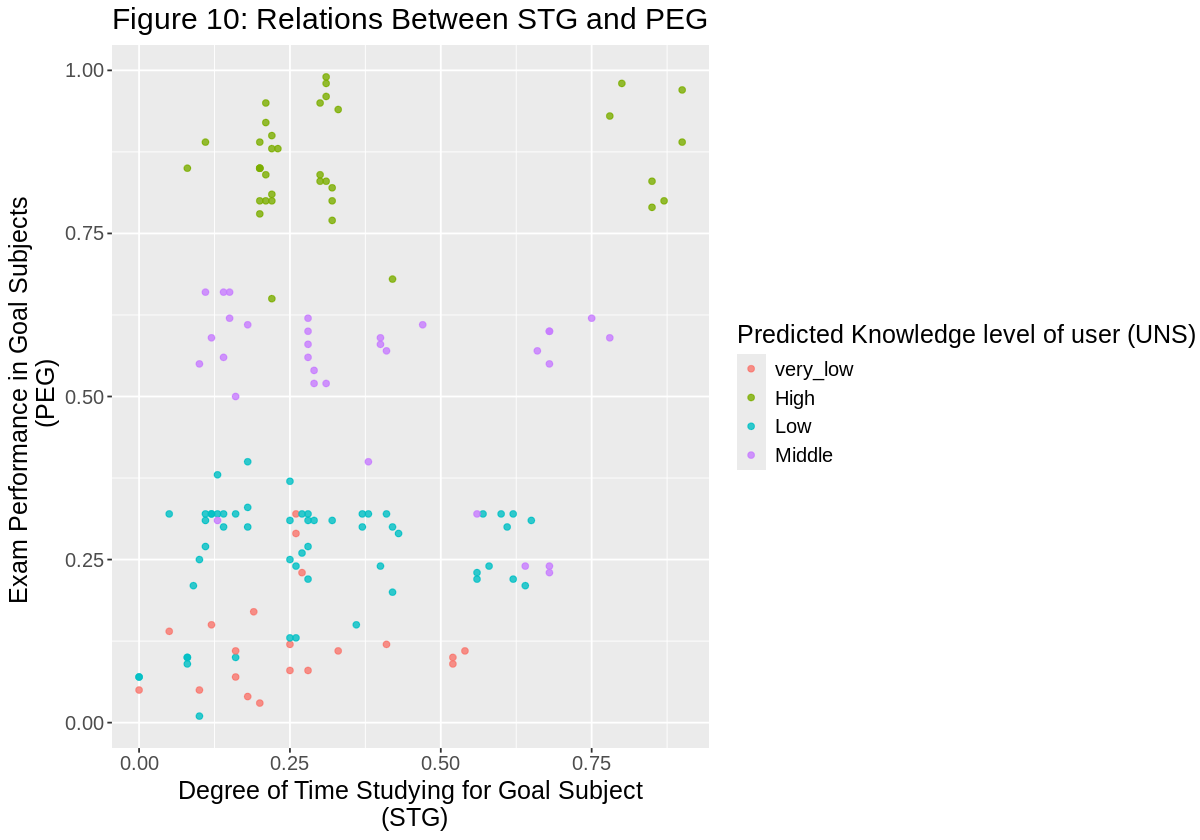

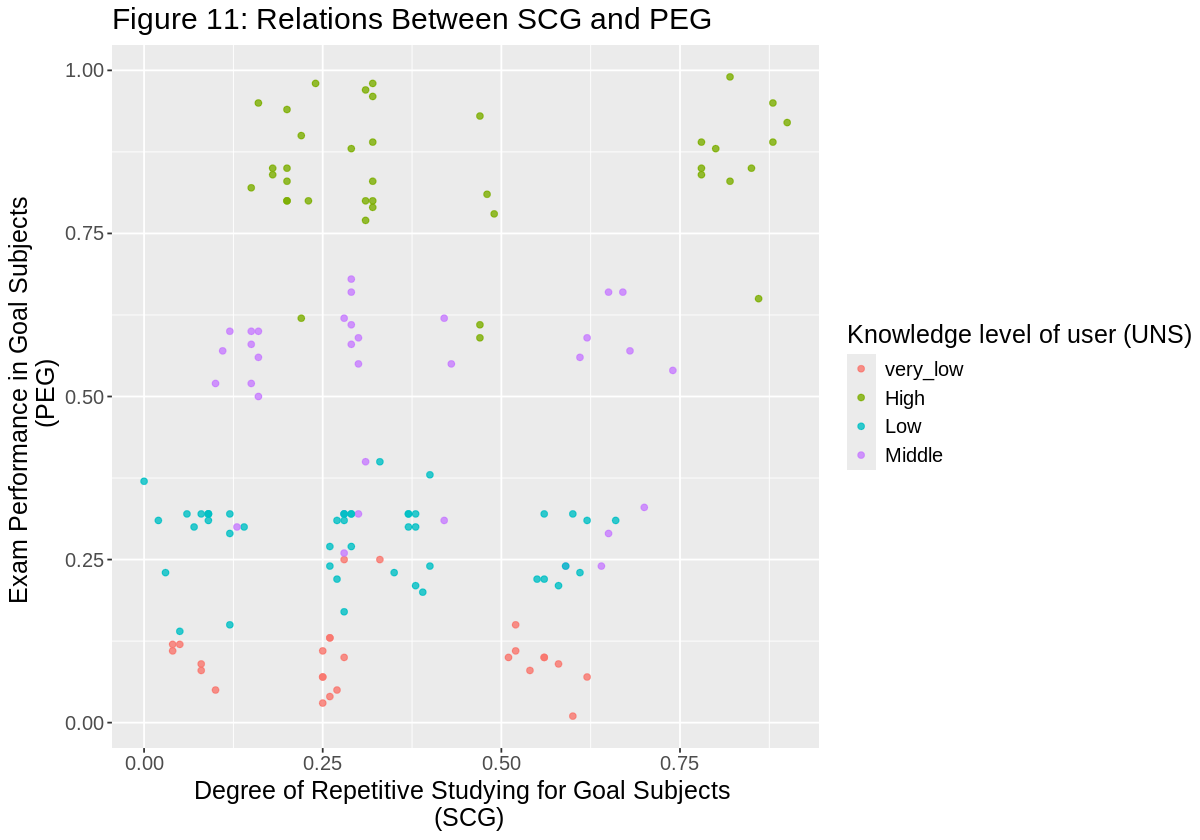

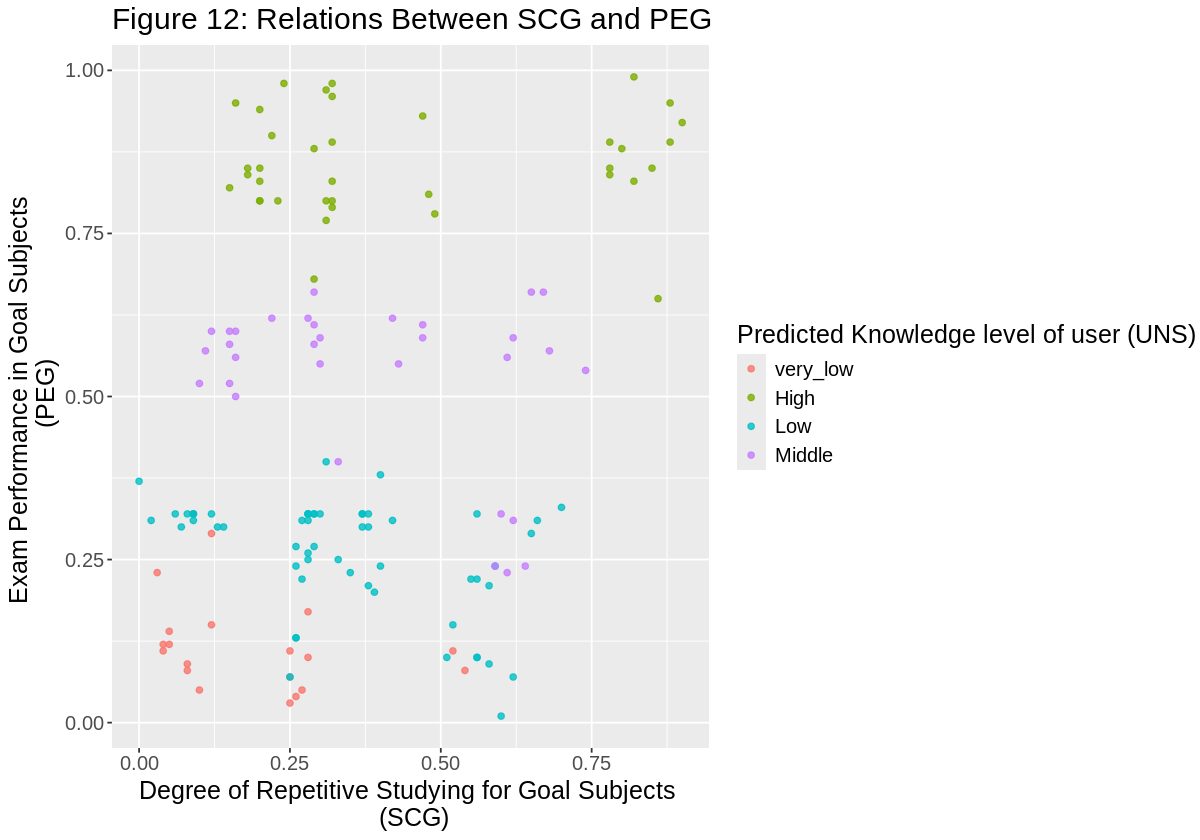

In [25]:
# Compare the truth and predictions using scatter plots
options(repr.plot.width=10,repr.plot.height=7)
plot_STG_PEG_actual<-predictions|>ggplot(aes(x=STG,y=PEG,color=UNS))+
    geom_point(alpha=0.8)+
    ggtitle("Figure 9: Relations Between STG and PEG")+
    labs(x="Degree of Time Studying for Goal Subject\n (STG)",
        y="Exam Performance in Goal Subjects \n (PEG)",
        color="Knowledge level of user (UNS)")+
    theme(text=element_text(size=15))
plot_STG_PEG_pred<-predictions|>ggplot(aes(x=STG,y=PEG,color=.pred_class))+
    geom_point(alpha=0.8)+
    ggtitle("Figure 10: Relations Between STG and PEG")+
    labs(x="Degree of Time Studying for Goal Subject\n (STG)",
        y="Exam Performance in Goal Subjects \n (PEG)",
        color="Predicted Knowledge level of user (UNS)")+
    theme(text=element_text(size=15))
plot_STG_PEG_actual
plot_STG_PEG_pred
plot_SCG_PEG_actual<-predictions|>ggplot(aes(x=SCG,y=PEG,color=UNS))+
    geom_point(alpha=0.8)+
    ggtitle("Figure 11: Relations Between SCG and PEG")+
    labs(x="Degree of Repetitive Studying for Goal Subjects \n (SCG)",
        y="Exam Performance in Goal Subjects \n (PEG)",
        color="Knowledge level of user (UNS)")+
    theme(text=element_text(size=15))
plot_SCG_PEG_pred<-predictions|>ggplot(aes(x=SCG,y=PEG,color=.pred_class))+
    geom_point(alpha=0.8)+
    ggtitle("Figure 12: Relations Between SCG and PEG")+
    labs(x="Degree of Repetitive Studying for Goal Subjects \n (SCG)",
        y="Exam Performance in Goal Subjects \n (PEG)",
        color="Predicted Knowledge level of user (UNS)")+
    theme(text=element_text(size=15))
plot_SCG_PEG_actual
plot_SCG_PEG_pred

- analysis:
The model we have created demonstrates a high capacity for making accurate predictions, as the evaluated accuracy is 75% for predicting student understanding. While the best K value may be high at K=7 and may warrant concern for overfitting, due to our steps in addressing class imbalance and ensuring a relatively even distribution for each level of understanding in our cross validation training, the model is more applicable for real-life evaluations for university students. Moreover, as our model uses 2 predictors for a relatively large dataset of 200 entries, a larger K is more reasonable to cover the distributions using only STG and PEG as predictors for student understanding. Some insights obtained from our model strongly suggest that students who have a "very low" understanding do not partake in strategies such as active recall and repetitive studying for a certain subject. It is worth noting that while our model only has a 75% accuracy, it may be higher in real life when considering the arbitrary difference between low and very low understanding. Both parties ma

- Discussion: 

**<u><h4>Reference:**</u></h4>

Kahraman, H. T., Sagiroglu, S., & Colak, I. (2013). The development of intuitive knowledge classifier and the modeling of Domain Dependent Data. Knowledge-Based Systems, 37, 283–295. https://doi.org/10.1016/j.knosys.2012.08.009<br> 

Kahraman,Hamdi, Colak,Ilhami, and Sagiroglu,Seref. (2013). User Knowledge Modeling. UCI Machine Learning Repository. https://doi.org/10.24432/C5231X.

<h4>BELOW: NOT IN ALPHABETICAL ORDER, A FEW LITERATURE THAT SEEMS TO BE RELEVANT TO OUR PROJECT, FEEL FREE TO DELETE SOME</h4>

Plajner, M., Vomlel, J. (2021). Bayesian Networks for the Test Score Prediction: A Case Study on a Math Graduation Exam. In: Vejnarová, J., Wilson, N. (eds) Symbolic andQuantitative Approaches to Reasoning with Uncertainty. ECSQARU 2021. Lecture Notes in Computer Science(), vol 12897. Springer, Cham. https://doi.org/10.1007/978-3-030-86772-0_19
* this is a part of a book series and conference series so I am not sure if it is considered a literature (??)
* it talks about using student knowledge level to predict their exam score, so it's kind of our project but in reverse if that makes sense. 

Karakoc, D., & Kose, G. D. (2017). The impact of vocabulary knowledge on reading, writing and proficiency scores of efl learners. The Journal of Language and Linguistic Studies, 13(1), 352-378. (website: https://eric.ed.gov/?id=EJ1140609)
* used the vocab knowledge, reading and writing performance in relations to writing, reading and vocab exams
* mostly postitive correlations (small positive)

Hediyeh, H., Sayed, T., & Zaki, M. H. (2013). Use of Spatiotemporal Parameters of Gait for Automated Classification of Pedestrian Gender and Age. Transportation Research Record, 2393(1), 31-40. https://doi.org/10.3141/2393-04<br>
* the study tries to predict the age and gender of pedestrian from their step frequency and step length.
* used knn as their algorithm for classification, had pretty good results <br>

Lai, Y., Wu, B., & Zhao, H. (2011). A permutation test approach to the choice of size k for the nearest neighbors classifier. Journal of Applied Statistics, 38(10), 2289–2302. https://doi.org/10.1080/02664763.2010.547565<br>
- talks about knn in general, how it works, gives examples
- they found that their approach ("assign each k a permutation test based Z-score") had a high prediction than the cross validation
  

- literature that shows the relations betweem Exam score and students' konwledge level.